# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
api_key = weather_api_key

# Define units of measurement for temp
temp_units = "imperial"

# Citipy used to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_file = "cities.csv"
cities_new = pd.read_csv(cities_file)
cities_new.head(10)

url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[0]

'airai'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Lists for new dataframe
City_one = []
Cloudiness = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
Country = []

# Setting the count
count_one = 0
set_one = 1

# City_API_endpoint = "http://api.openweathermap.org/data/2.5/weather?q="
# City = "Nairobi"
# Country = ",KE,"
# join_key = "&appid=" + "24a28e84879c0723de4182ce4313653b"
# units = "&units=metric"

# current_city_weather = City_API_endpoint + City + Country + join_key + units
# print(current_city_weather)
      
# Looping through the data
#for city in cities:
    


Beginning Data Retrieval
-------------------------------


In [40]:
# Print start of data retrieval
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            City_one.append(city)
        else:
            count_one += 1
            City_one.append(city)
        # Wait
        time.sleep(1)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | syracuse
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | oranjemund
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | dongsheng
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | vaini
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | bogovarovo
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | lagoa
City not found. Skipping...
Processing Record 12 of Set 1 | sao sebastiao
Processing Record 13 of Set 1 | porto novo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | pisco
Processing Record 

Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | pangoa
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | makakilo city
Processing Record 43 of Set 4 | gravdal
Processing Record 44 of Set 4 | vostok
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | yaan
Processing Record 48 of Set 4 | camacha
Processing Record 49 of Set 4 | ahipara
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | aksu
Processing Record 4 of Set 5 | safaga
Processing Record 5 of Set 5 | jesup
Processing Record 6 of Set 5 | bhattiprolu
City not found. Skipping...
Processing Record 7 of Set 5 | bonthe
Processing Record 8 of Set 5 | santa fe
City not found. Skipping...
Processing Record 9 of Set 5 | chesma
Processing Record 10 of Set 5 | chuy
Processing Record 11 of Set 5 | mount gambier
Processing

Processing Record 26 of Set 8 | ust-nera
Processing Record 27 of Set 8 | loreto
Processing Record 28 of Set 8 | linares
City not found. Skipping...
Processing Record 29 of Set 8 | manokwari
Processing Record 30 of Set 8 | sibolga
City not found. Skipping...
Processing Record 31 of Set 8 | gigmoto
Processing Record 32 of Set 8 | guangyuan
Processing Record 33 of Set 8 | chapais
City not found. Skipping...
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | jalu
Processing Record 36 of Set 8 | lazarev
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | hondo
Processing Record 39 of Set 8 | desna
Processing Record 40 of Set 8 | kodiak
Processing Record 41 of Set 8 | troitskoye
Processing Record 42 of Set 8 | kirillov
Processing Record 43 of Set 8 | koslan
Processing Record 44 of Set 8 | kyshtovka
Processing Record 45 of Set 8 | manati
Processing Record 46 of Set 8 | ilo
Processing Record 47 of Set 8 | beian
Processing Record 48 of Set 8 | strezhevoy
Pr

In [45]:
# Convert raw data to dataframe, export city data into a CSV and display dataframe
weather_dictionary = {
    "City":City_one,
    "Lat":Lat,
    "Lng":Lng,
    "Max Temp":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date
}


In [46]:
# Creating the dataframe
weather_df = pd.DataFrame(weather_dictionary)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,66.02,62,10,4.09,TL,1620778930
1,syracuse,37.0881,15.2792,61.00,88,0,8.05,IT,1620778649
2,hermanus,-34.4187,19.2345,57.99,82,0,1.99,ZA,1620778933
3,oranjemund,-28.5500,16.4333,58.28,84,0,6.11,NA,1620778934
4,pevek,69.7008,170.3133,18.72,87,94,2.57,RU,1620778935


In [48]:
# Output to csv file
weather_df.to_csv(cities_file)

In [ ]:
#  Get the indices of cities that have humidity over 100%.



In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

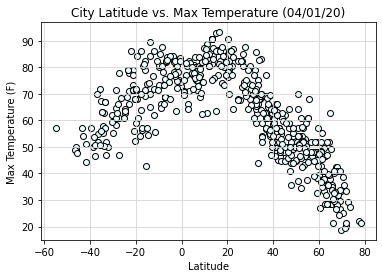

In [50]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="azure")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Lat vs. Temp Plot.png")
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression